### EDA:
 - type of crime
 - location of crime 
 - time of occuraence of the crime 
     -infer severity 
     
     - visualize data under multiple parameter constraints producing interactive plots
         -to perform cluster analysis in the future
    ## later goasl:

     - figure out lat and long of the crime
     - total cluster crimes in that specific area
     - coressponding circle size will represent the intensity of crimes
     - red areas will depict the areas with max crimes


. The nature of a crime could include features relating to the crime such as the offender(s) age, gender, location, number of offenders, education status, income, the weapon used, victim(s) age, gender, location, economic status, education status, time, date, day of the week, year, month, to name a few.

In [1]:
!pip install sodapy

In [2]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 4.3 MB/s eta 0:00:0000:0100:01


In [203]:
#importing and reading data 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
plt.style.use('ggplot')

In [204]:
import os
import glob
import sys
import datetime
import json
from datetime import timedelta

In [205]:
pd.options.display.max_columns = 200


In [206]:
df=pd.read_csv('/Users/fatimagowher/Downloads/5_years.csv')

In [207]:
df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,x_coordinate,y_coordinate,latitude,longitude,location.latitude,location.longitude,location.human_address,total_offenders_in_ca,total_complaints_in_ca
0,13211437,JG425074,2019-01-01 00:00:00,009XX N HAMLIN AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1112,11,27.0,23.0,17,2019,2023-09-16T15:42:58.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,151.0
1,11895528,JC515003,2019-01-01 00:00:00,059XX W LELAND AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1622,16,45.0,15.0,11,2019,2019-11-19T15:41:37.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,102.0
2,12325061,JE180772,2019-01-01 00:00:00,045XX S CHAMPLAIN AVE,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,221,2,4.0,38.0,02,2019,2021-07-02T15:40:59.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,92.0
3,12298601,JE148751,2019-01-01 00:00:00,057XX S WOLCOTT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,715,7,15.0,67.0,11,2019,2021-02-23T15:40:09.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,97.0
4,12312332,JE165297,2019-01-01 00:00:00,009XX W 76TH ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,621,9,17.0,71.0,02,2019,2021-04-29T15:39:44.000,1174671.0,1877106.0,41.818171,-87.634761,41.818171,-87.634761,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",79.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181134,13330925,JH106755,2023-12-31 00:00:00,004XX E 40TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,214,2,3.0,38.0,08B,2023,2024-01-08T15:59:16.000,1180037.0,1878244.0,41.821173,-87.615042,41.821173,-87.615042,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",11.0,92.0
1181135,13330361,JH106334,2023-12-31 00:00:00,046XX W MONROE ST,1585,SEX OFFENSE,OTHER,RESIDENCE,False,True,1113,11,28.0,25.0,17,2023,2024-01-08T15:59:16.000,1145450.0,1899160.0,41.879292,-87.741397,41.879292,-87.741397,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",69.0,156.0
1181136,13332523,JH109050,2023-12-31 00:00:00,021XX N LINCOLN AVE,0890,THEFT,FROM BUILDING,RESIDENCE - PORCH / HALLWAY,False,False,1812,18,43.0,7.0,06,2023,2024-01-10T15:41:17.000,1172279.0,1914529.0,41.920916,-87.642431,41.920916,-87.642431,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",5.0,567.0
1181137,13332454,JH108711,2023-12-31 00:00:00,047XX W FULTON ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,1113,11,28.0,25.0,05,2023,2024-01-10T15:41:17.000,1144721.0,1901371.0,41.885373,-87.744018,41.885373,-87.744018,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",69.0,156.0


In [208]:
df.shape

(1181139, 26)

In [209]:
df.head(5)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,x_coordinate,y_coordinate,latitude,longitude,location.latitude,location.longitude,location.human_address,total_offenders_in_ca,total_complaints_in_ca
0,13211437,JG425074,2019-01-01 00:00:00,009XX N HAMLIN AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1112,11,27.0,23.0,17,2019,2023-09-16T15:42:58.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,151.0
1,11895528,JC515003,2019-01-01 00:00:00,059XX W LELAND AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1622,16,45.0,15.0,11,2019,2019-11-19T15:41:37.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,102.0
2,12325061,JE180772,2019-01-01 00:00:00,045XX S CHAMPLAIN AVE,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,221,2,4.0,38.0,02,2019,2021-07-02T15:40:59.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,92.0
3,12298601,JE148751,2019-01-01 00:00:00,057XX S WOLCOTT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,715,7,15.0,67.0,11,2019,2021-02-23T15:40:09.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,97.0
4,12312332,JE165297,2019-01-01 00:00:00,009XX W 76TH ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,621,9,17.0,71.0,02,2019,2021-04-29T15:39:44.000,1174671.0,1877106.0,41.818171,-87.634761,41.818171,-87.634761,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",79.0,92.0


In [210]:
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'year', 'updated_on',
       'x_coordinate', 'y_coordinate', 'latitude', 'longitude',
       'location.latitude', 'location.longitude', 'location.human_address',
       'total_offenders_in_ca', 'total_complaints_in_ca'],
      dtype='object')

In [211]:
df.dtypes

id                          int64
case_number                object
date                       object
block                      object
iucr                       object
primary_type               object
description                object
location_description       object
arrest                       bool
domestic                     bool
beat                        int64
district                    int64
ward                      float64
community_area            float64
fbi_code                   object
year                        int64
updated_on                 object
x_coordinate              float64
y_coordinate              float64
latitude                  float64
longitude                 float64
location.latitude         float64
location.longitude        float64
location.human_address     object
total_offenders_in_ca     float64
total_complaints_in_ca    float64
dtype: object

In [212]:
df.describe()

,id,beat,district,ward,community_area,year,x_coordinate,y_coordinate,latitude,longitude,location.latitude,location.longitude,total_offenders_in_ca,total_complaints_in_ca
count,1.181139e+06,1.181139e+06,1.181139e+06,1.181091e+06,1.181137e+06,1.181139e+06,1.164132e+06,1.164132e+06,1.164132e+06,1.164132e+06,1.164132e+06,1.164132e+06,1.164416e+06,1.181137e+06
mean,1.240922e+07,1.148710e+03,1.125787e+01,2.319778e+01,3.670866e+01,2.021019e+03,1.165157e+06,1.886394e+06,4.184385e+01,-8.766944e+01,4.184385e+01,-8.766944e+01,4.085039e+01,1.662791e+02
std,8.430467e+05,7.023369e+02,7.018504e+00,1.396227e+01,2.154244e+01,1.464664e+00,1.648693e+04,3.189109e+04,8.771045e-02,5.996244e-02,8.771045e-02,5.996244e-02,3.325971e+01,1.357219e+02
min,2.436800e+04,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,3.661945e+01,-9.168657e+01,3.661945e+01,-9.168657e+01,2.000000e+00,7.000000e+00
25%,1.199116e+07,6.110000e+02,6.000000e+00,1.000000e+01,2.300000e+01,2.020000e+03,1.153533e+06,1.858796e+06,4.176792e+01,-8.771166e+01,4.176792e+01,-8.771166e+01,1.400000e+01,8.000000e+01
50%,1.244621e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,2.021000e+03,1.166982e+06,1.892717e+06,4.186134e+01,-8.766289e+01,4.186134e+01,-8.766289e+01,2.400000e+01,1.020000e+02
75%,1.289199e+07,1.723000e+03,1.700000e+01,3.400000e+01,5.300000e+01,2.022000e+03,1.176740e+06,1.909398e+06,4.190704e+01,-8.762710e+01,4.190704e+01,-8.762710e+01,6.300000e+01,2.300000e+02
max,1.333522e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,2.023000e+03,1.205119e+06,1.951527e+06,4.202259e+01,-8.752453e+01,4.202259e+01,-8.752453e+01,1.270000e+02,5.670000e+02


### data prep

In [ ]:
#dropping columns 
df.drop(['column_name'],axis=1)

#subsetting data example

df=df[['column_name']].copy()

#renaming a columns 
df=df.rename(columns={'old_name':'new_name','old_name':'new_name'})

In [213]:
df['updated_on']=pd.to_datetime(df['updated_on'])

In [214]:
df.date

0          2019-01-01 00:00:00
1          2019-01-01 00:00:00
2          2019-01-01 00:00:00
3          2019-01-01 00:00:00
4          2019-01-01 00:00:00
                  ...         
1181134    2023-12-31 00:00:00
1181135    2023-12-31 00:00:00
1181136    2023-12-31 00:00:00
1181137    2023-12-31 00:00:00
1181138    2023-12-31 00:00:00
Name: date, Length: 1181139, dtype: object

In [215]:
df['date'] = pd.to_datetime(df['date'])


In [216]:
# setting the index to be the date will help us a lot later on
df.index = pd.DatetimeIndex(df.date)

In [217]:
#As 'Location Description', 'Description' and 'Primary Type' columns are actually 
#categorical columns (or factors in R), we will only keep the most frequent categories and then cast 
#them to a categorical type.



loc_to_change  = list(df['location_description'].value_counts()[20:].index)
desc_to_change = list(df['description'].value_counts()[20:].index)

df.loc[df['location_description'].isin(loc_to_change) , df.columns=='location_description'] = 'OTHER'
df.loc[df['description'].isin(desc_to_change) , df.columns=='description'] = 'OTHER'

In [218]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
df['primary_type']         = pd.Categorical(df['primary_type'])
df['location_description'] = pd.Categorical(df['location_description'])
df['description']          = pd.Categorical(df['description'])

In [219]:
pd.to_numeric(df['year'])

date
2019-01-01    2019
2019-01-01    2019
2019-01-01    2019
2019-01-01    2019
2019-01-01    2019
              ... 
2023-12-31    2023
2023-12-31    2023
2023-12-31    2023
2023-12-31    2023
2023-12-31    2023
Name: year, Length: 1181139, dtype: int64

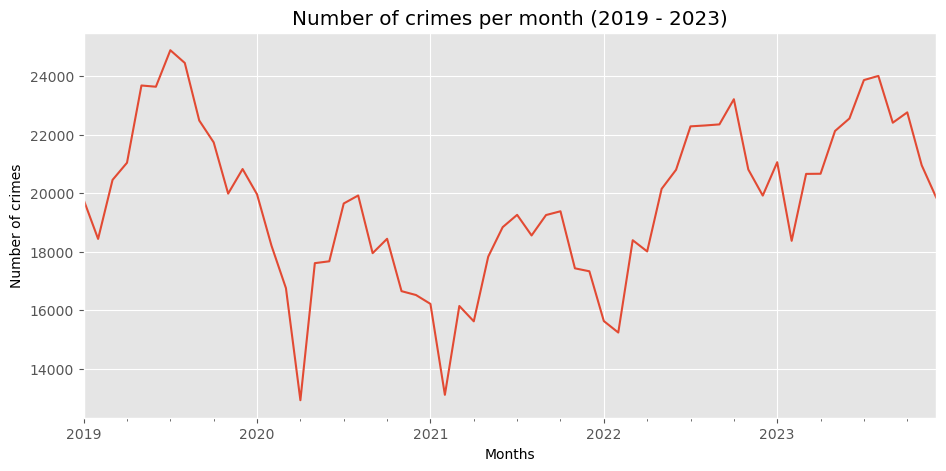

In [221]:
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2019 - 2023)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()


#This chart shows a clear "periodic" pattern in the crimes over many years. I guess this very periodic pattern is an essential part of why crime a very predictable activity!.



In [ ]:
We see the line decreasing from 2020 up to some point around 2021 after
which it stays around the same number of crimes.
This all means that 2016 is really no better than 2015, but both years show a much better crime record (in total) than the previous years.

But..

could this figure be too good to be true?

Let's separate crimes by type and see

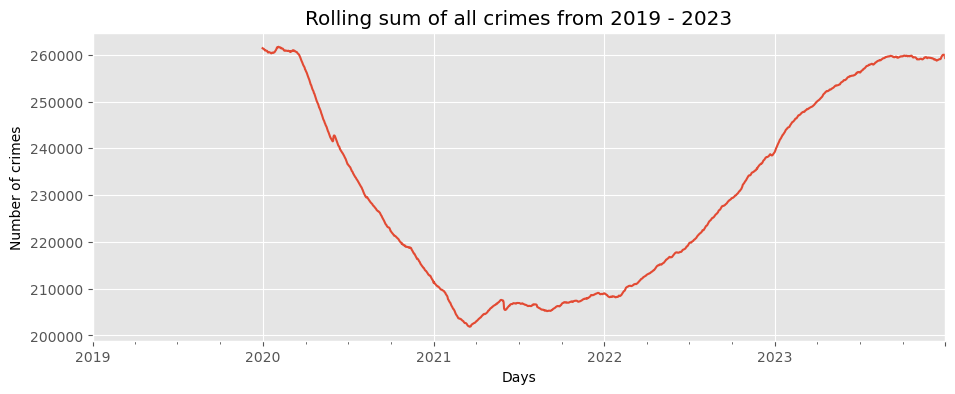

In [223]:
plt.figure(figsize=(11,4))
df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2019 - 2023')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()




We see the line decreasing from 2020 up to some point around 2021 after
which it increases in the number of crimes exponentially 
This all means that 2020 is really a outlier year 
but both years show a much better crime record (in total) than the previous years.

But..

could this figure be too good to be true?

Let's separate crimes by type and see

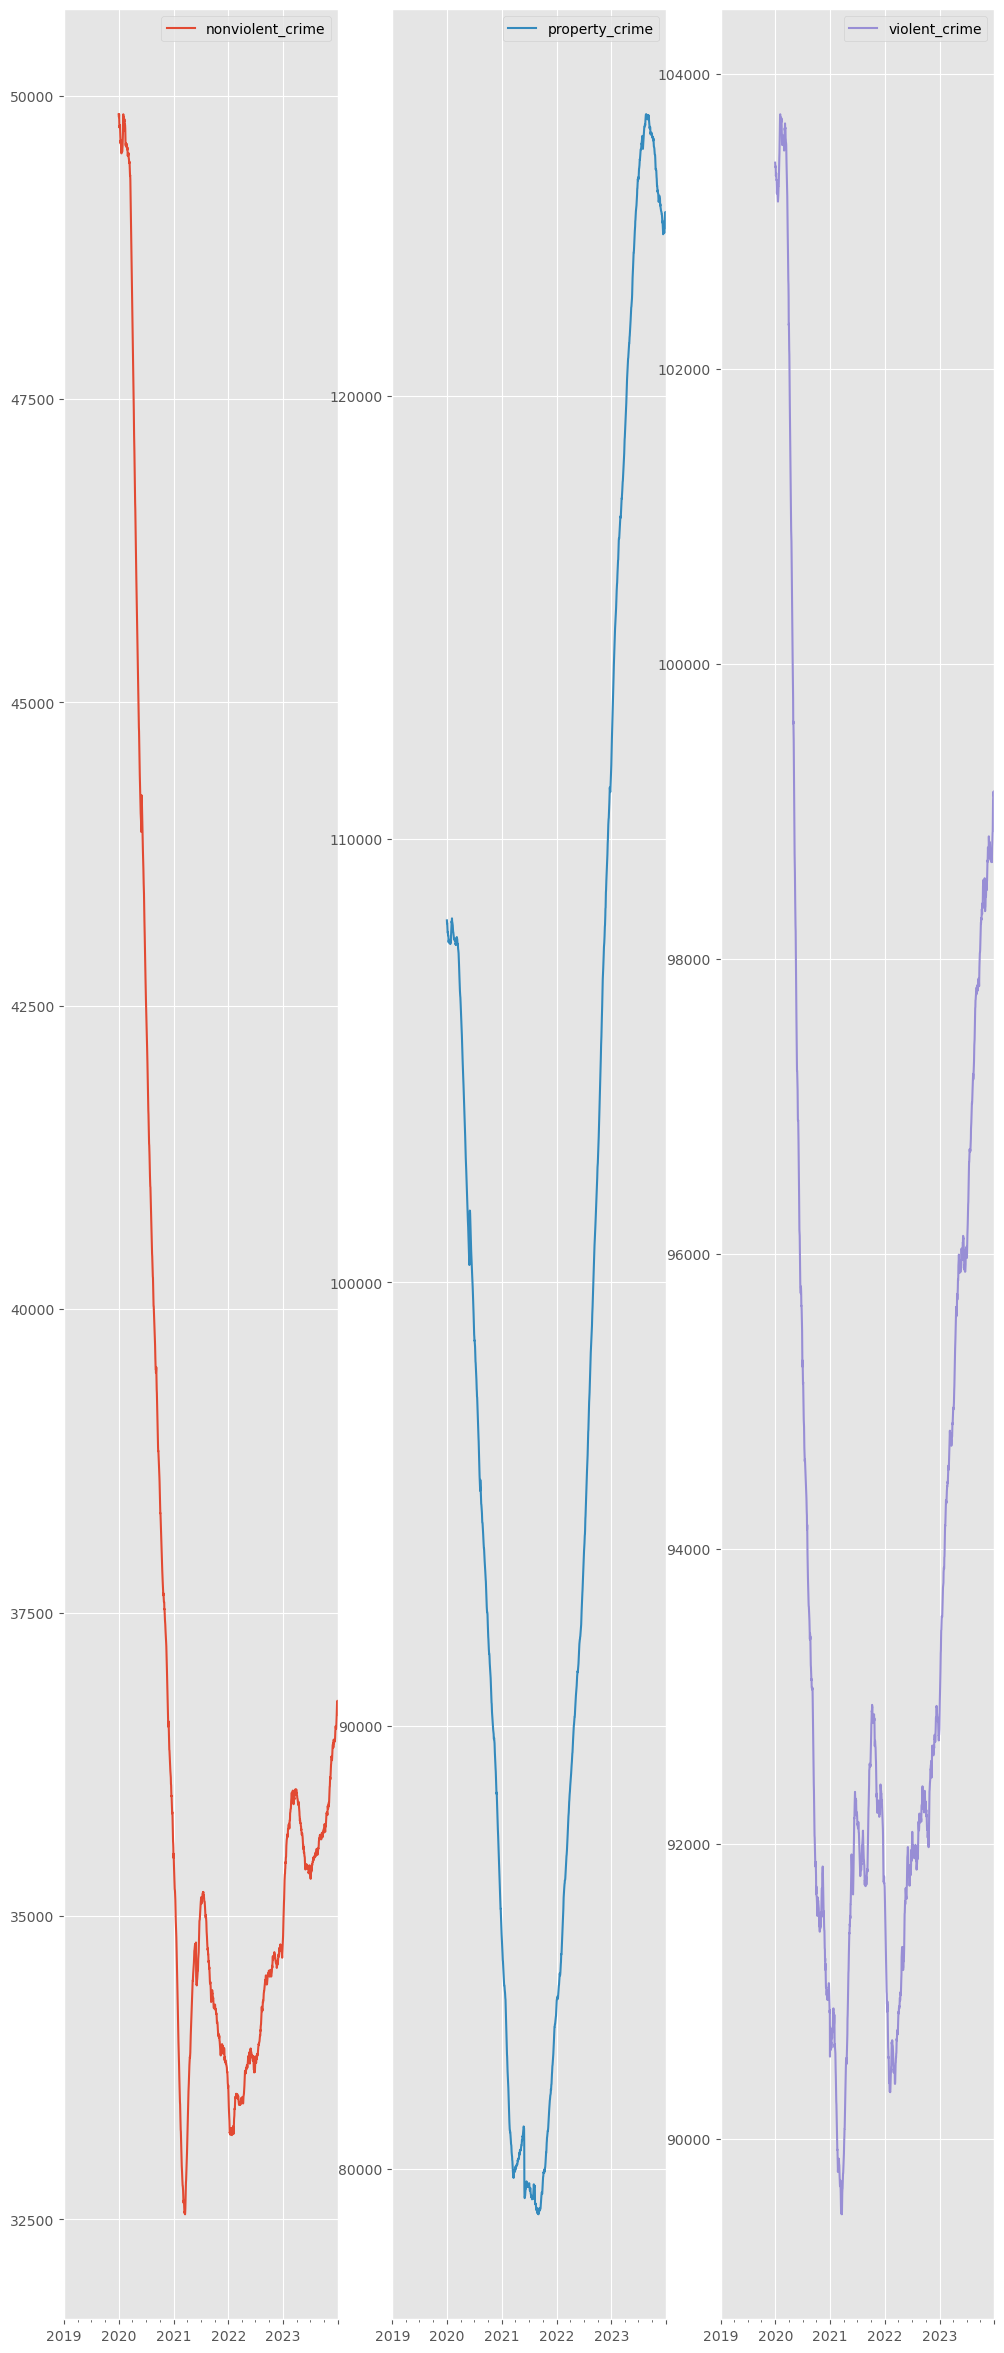

In [226]:
crimes_count_date = df.pivot_table('id', aggfunc=np.size, columns='crime_category', index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

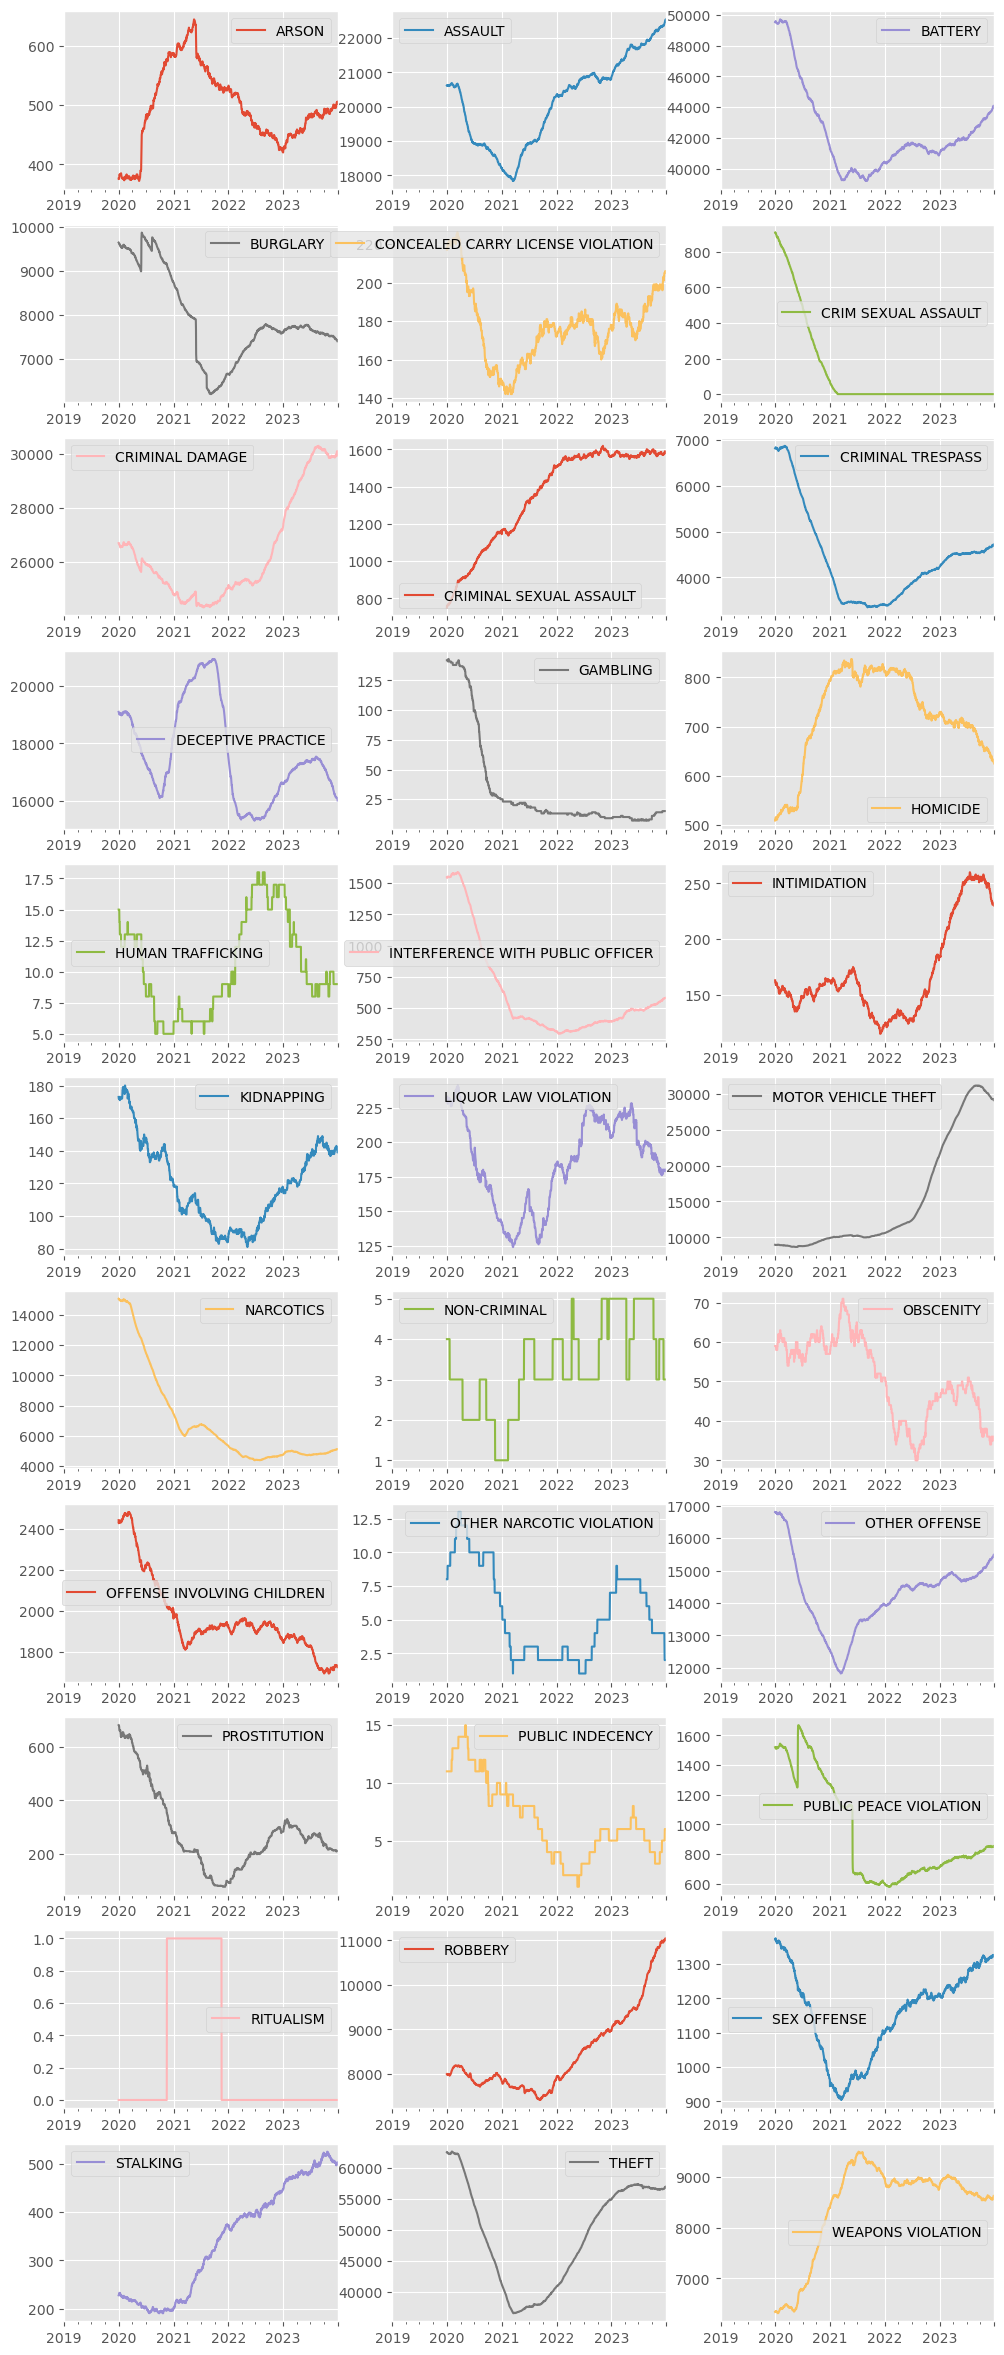

In [171]:
crimes_count_date = df.pivot_table('id', aggfunc=np.size, columns='primary_type', index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

### A general view of crime records by time, type and location
Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. In this section, we will see how crimes differ between different places at different times.

The first thing we are going to look at is if there is a difference in the number of crimes during specific days of the week. Are there more crimes during weekdays or weekend?

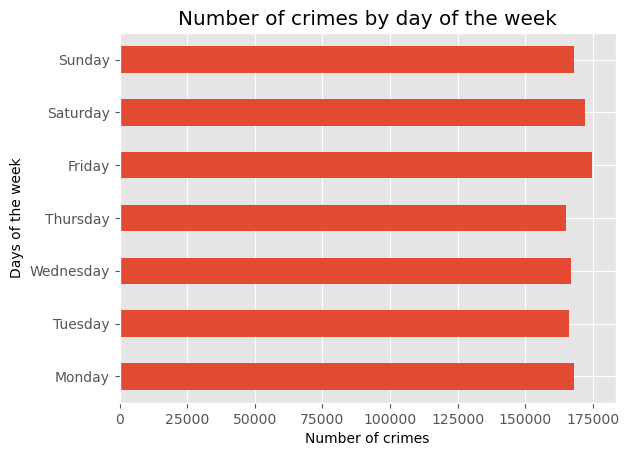

In [227]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

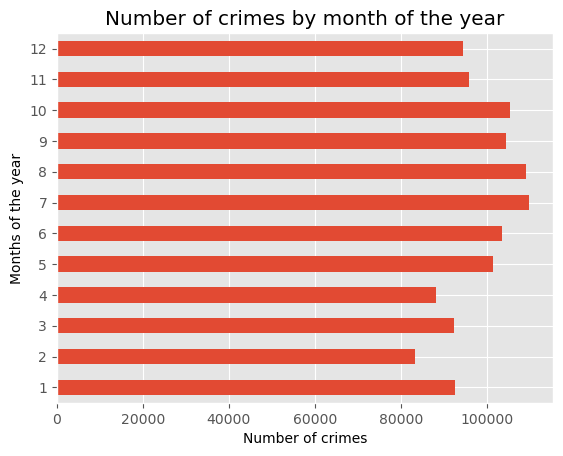

In [228]:
df.groupby([df.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

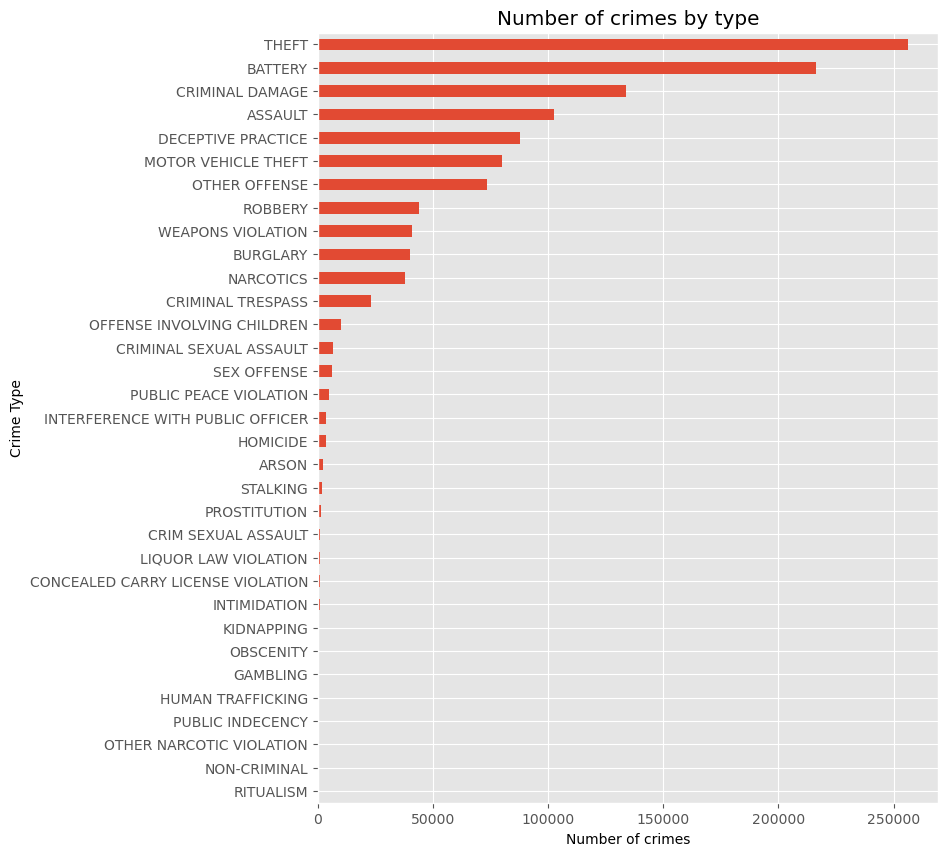

In [229]:
plt.figure(figsize=(8,10))
df.groupby([df['primary_type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

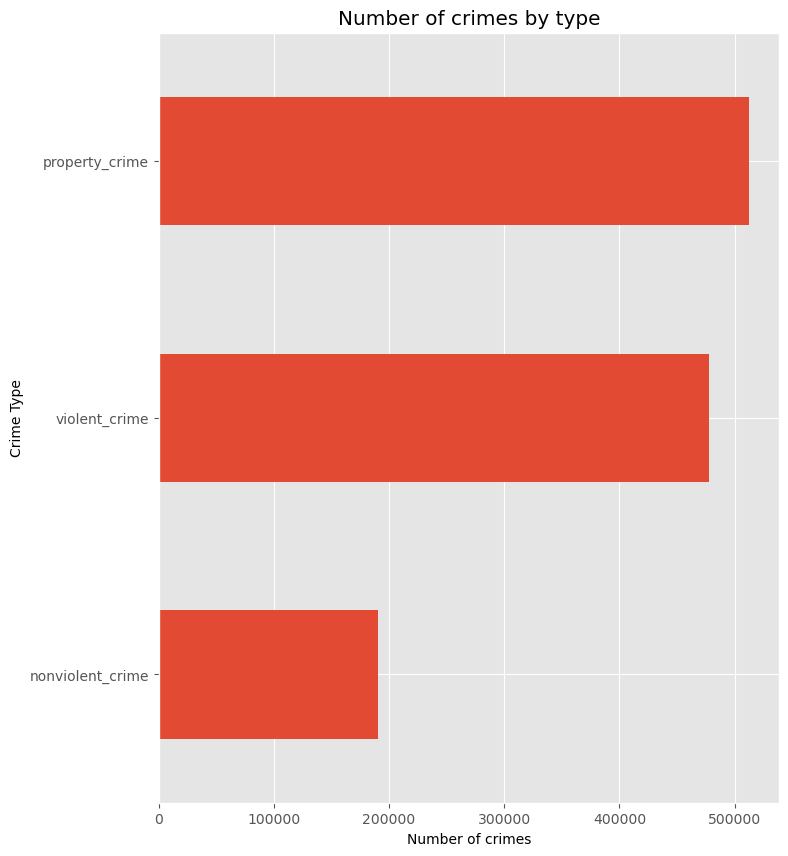

In [230]:
plt.figure(figsize=(8,10))
df.groupby([df['crime_category']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

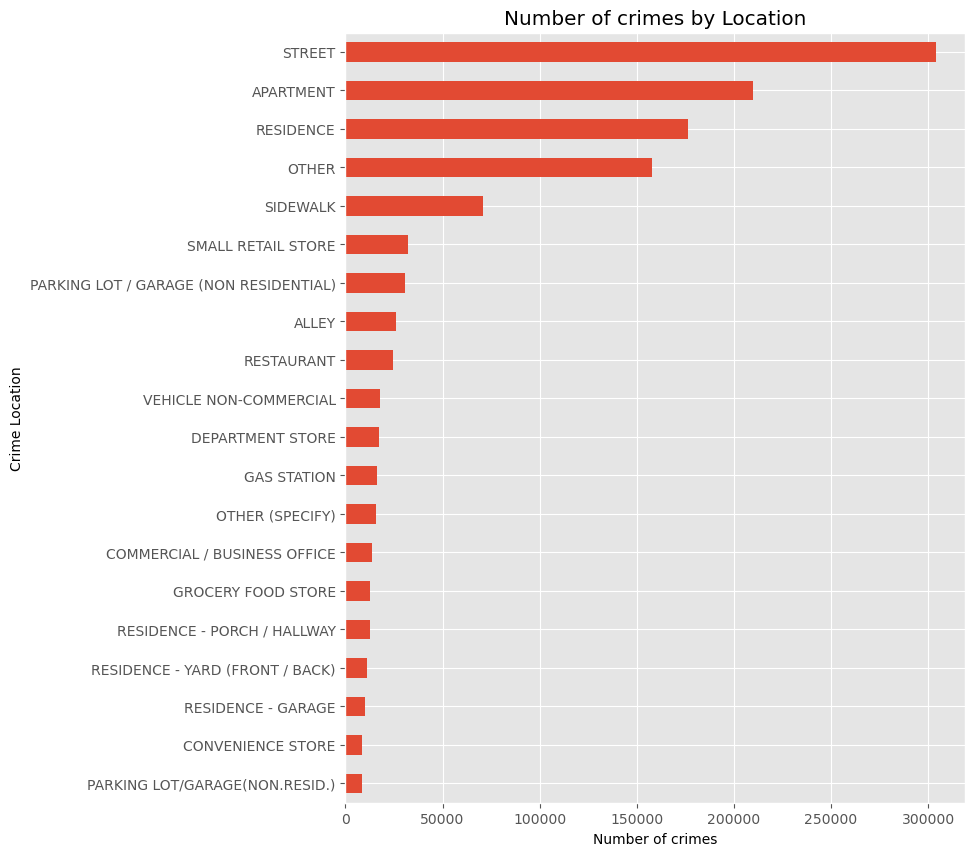

In [231]:
plt.figure(figsize=(8,10))
df.groupby([df['location_description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()


In [ ]:
annual_crime.plot(figsize=(10,12), subplots= True, legend=True, 
                           title='Chicago - Crime Volume Trend by Year',sharey=True )
plt.xlabel('Months')
plt.ylabel('Crime Count')
plt.xticks(ticks = range(0,12), labels= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug','Sept', 'Oct', 'Nov', 'Dec'])
plt.show();

### Temporal analysis of crime rates by type and location
I am not so excited by the charts so far. They are boring. They do not show me interesting things. It only felt like they make sense. In this section, things are way different. We will directly address the second question in the introduction.

Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. In this section, we will see how crimes differ between different places at different times.

After seeing the base rates of each crime location and type, we will now assume that all crime types (and locations) have the same frequency or, in other words, they are all equal overall. We are interested in detecting how a specific crime type is different across all days of the week or hours of the day.

Is theft or burglary is more likely to occur at a weekday compared to a weekend? Are they more likely to happen in the morning vs evening or late night ? are they more likely to occur in a street vs a bar?

Let's dig up using the fantastic 'pivot_table' from pandas.

In [232]:
#primary 
hour_by_location = df.pivot_table(values='id', index='location_description', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = df.pivot_table(values='id', index='primary_type', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = df.pivot_table(values='id', index=df.index.hour, columns=df.index.day_name(), aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = df.pivot_table(values='id', index='location_description', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = df.pivot_table(values='id', index='primary_type', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = df.pivot_table(values='id', index='location_description', columns='primary_type', aggfunc=np.size).fillna(0)

In [248]:
#crime 
hour_by_location = df.pivot_table(values='id', index='location_description', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_type_crime     = df.pivot_table(values='id', index='crime_category', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = df.pivot_table(values='id', index=df.index.hour, columns=df.index.day_name(), aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = df.pivot_table(values='id', index='location_description', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type_crime = df.pivot_table(values='id', index='crime_category', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type_crime  = df.pivot_table(values='id', index='location_description', columns='crime_category', aggfunc=np.size).fillna(0)


In [243]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df1(df1,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df1 - df1.mean(axis=axis)) / df1.std(axis=axis)

def plot_hmap(df1, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df1.shape[0])
    plt.imshow(df1.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df1.shape[0]), df1.index[ix])
    plt.xticks(np.arange(df1.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df1, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df1 and plot_hmap
    '''
    df1_marginal_scaled = scale_df1(df1.T).T
    if ix is None:
        ix = AC(4).fit(df1_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df1_marginal_scaled.values), np.abs(np.min(df1_marginal_scaled.values))])
    df1_marginal_scaled = np.clip(df1_marginal_scaled, -1*cap, cap)
    plot_hmap(df1_marginal_scaled, ix=ix)
    
def normalize(df1):
    result = df1.copy()
    for feature_name in df1.columns:
        max_value = df1[feature_name].max()
        min_value = df1[feature_name].min()
        result[feature_name] = (df1[feature_name] - min_value) / (max_value - min_value)
    return result

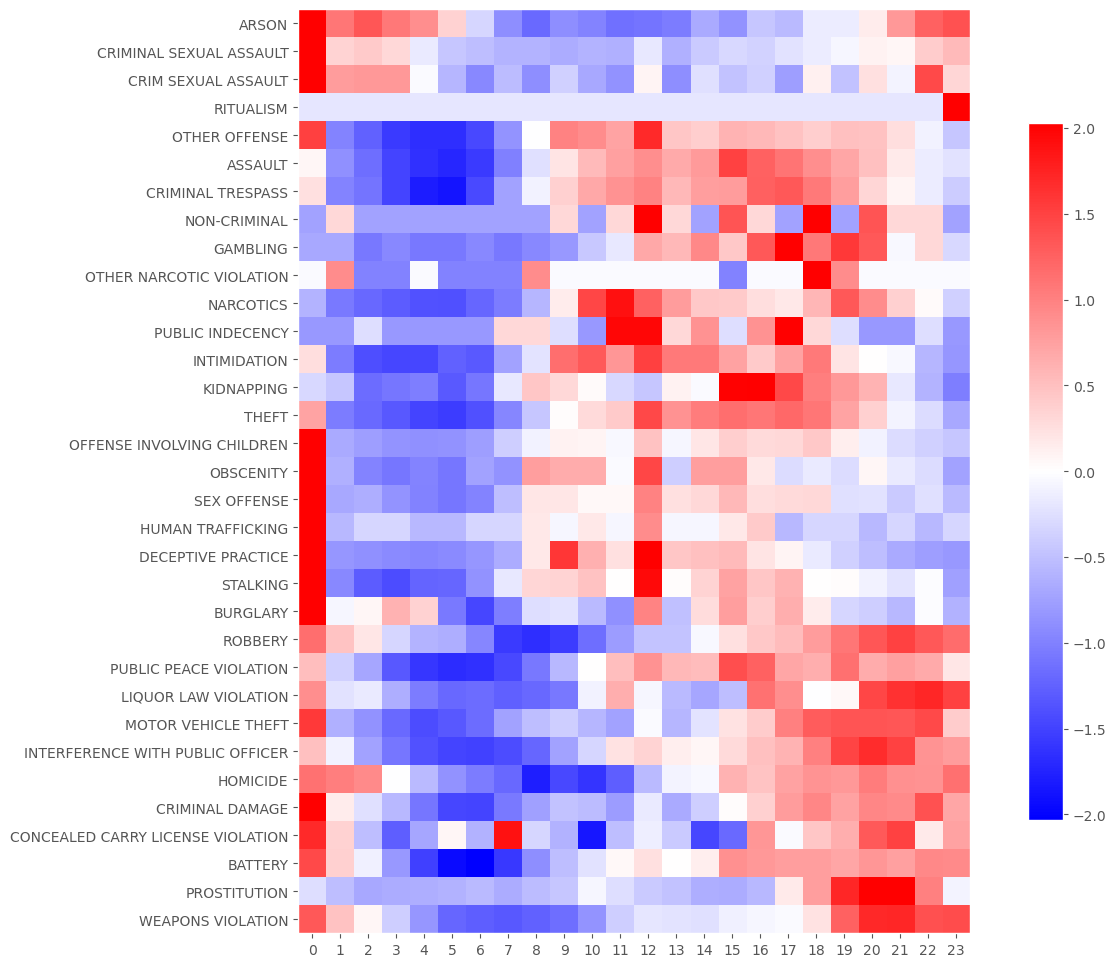

In [244]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

In [251]:
def scale_and_plot(df1, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df1 and plot_hmap
    '''
    df1_marginal_scaled = scale_df1(df1.T).T
    if ix is None:
        ix = AC(3).fit(df1_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df1_marginal_scaled.values), np.abs(np.min(df1_marginal_scaled.values))])
    df1_marginal_scaled = np.clip(df1_marginal_scaled, -1*cap, cap)
    plot_hmap(df1_marginal_scaled, ix=ix)
    

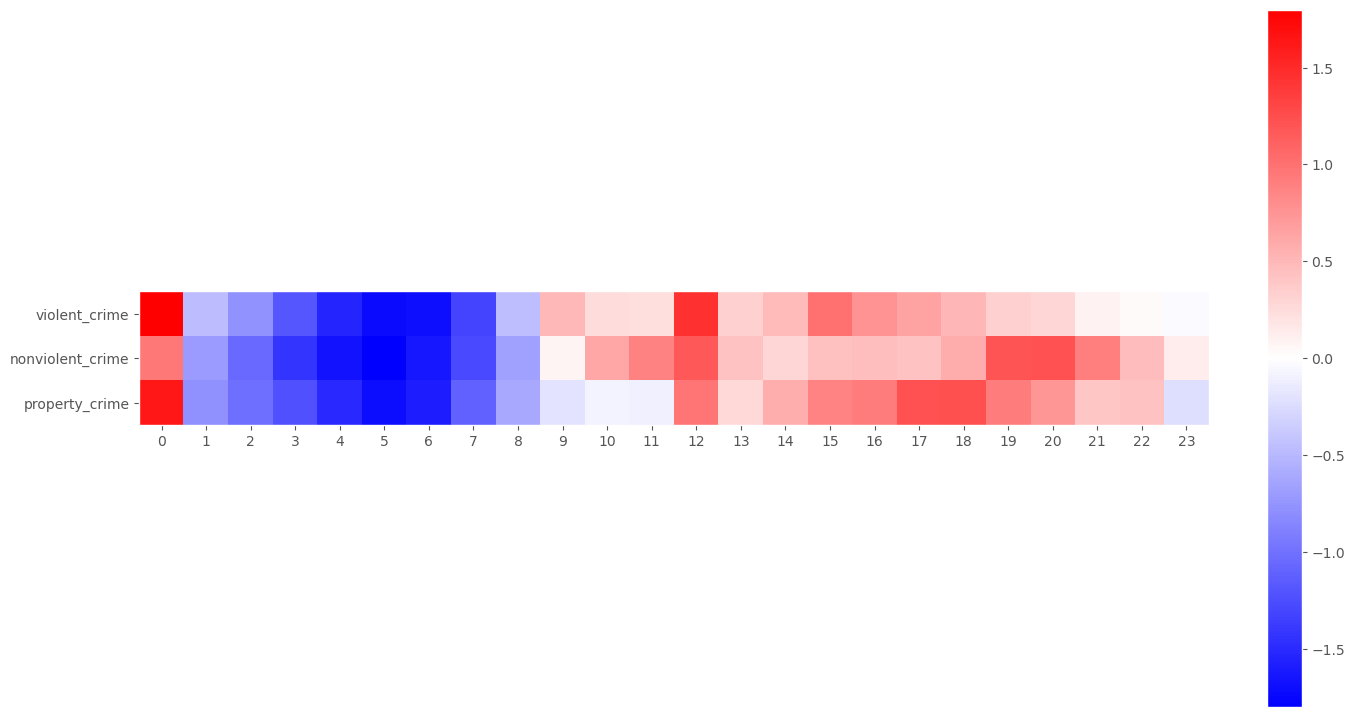

In [252]:
def scale_and_plot(df1, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df1 and plot_hmap
    '''
    df1_marginal_scaled = scale_df1(df1.T).T
    if ix is None:
        ix = AC(3).fit(df1_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df1_marginal_scaled.values), np.abs(np.min(df1_marginal_scaled.values))])
    df1_marginal_scaled = np.clip(df1_marginal_scaled, -1*cap, cap)
    plot_hmap(df1_marginal_scaled, ix=ix)
    
    
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type_crime)

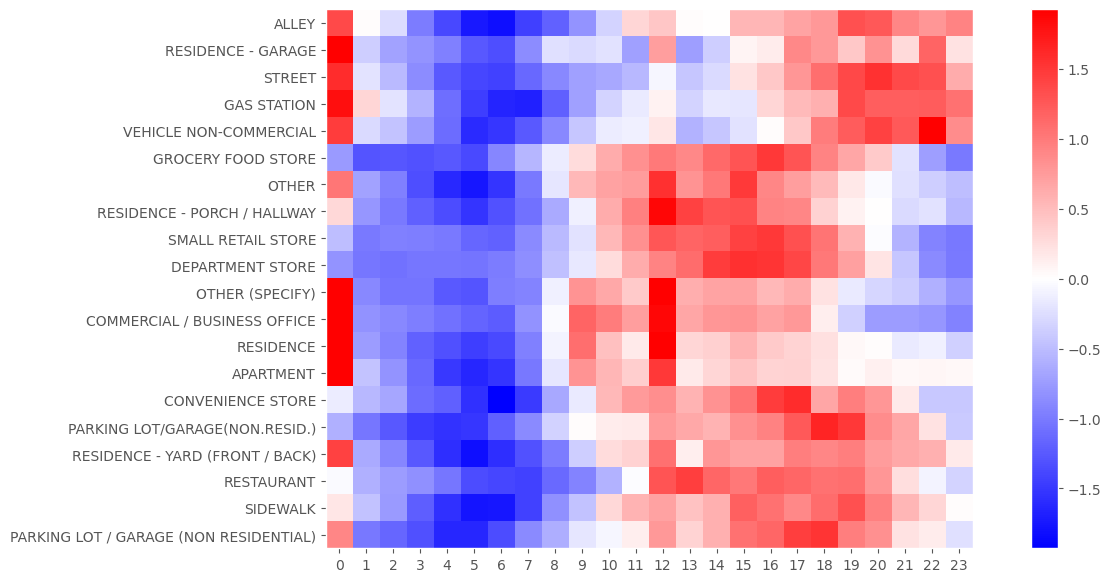

In [245]:
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

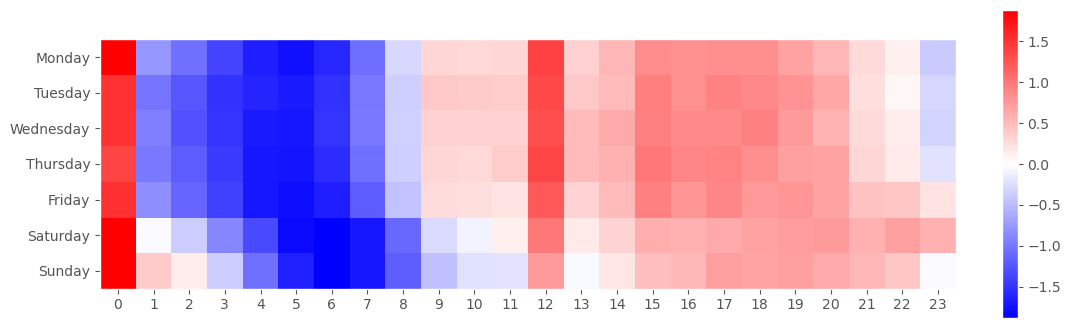

In [246]:
plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week, ix=np.arange(7))

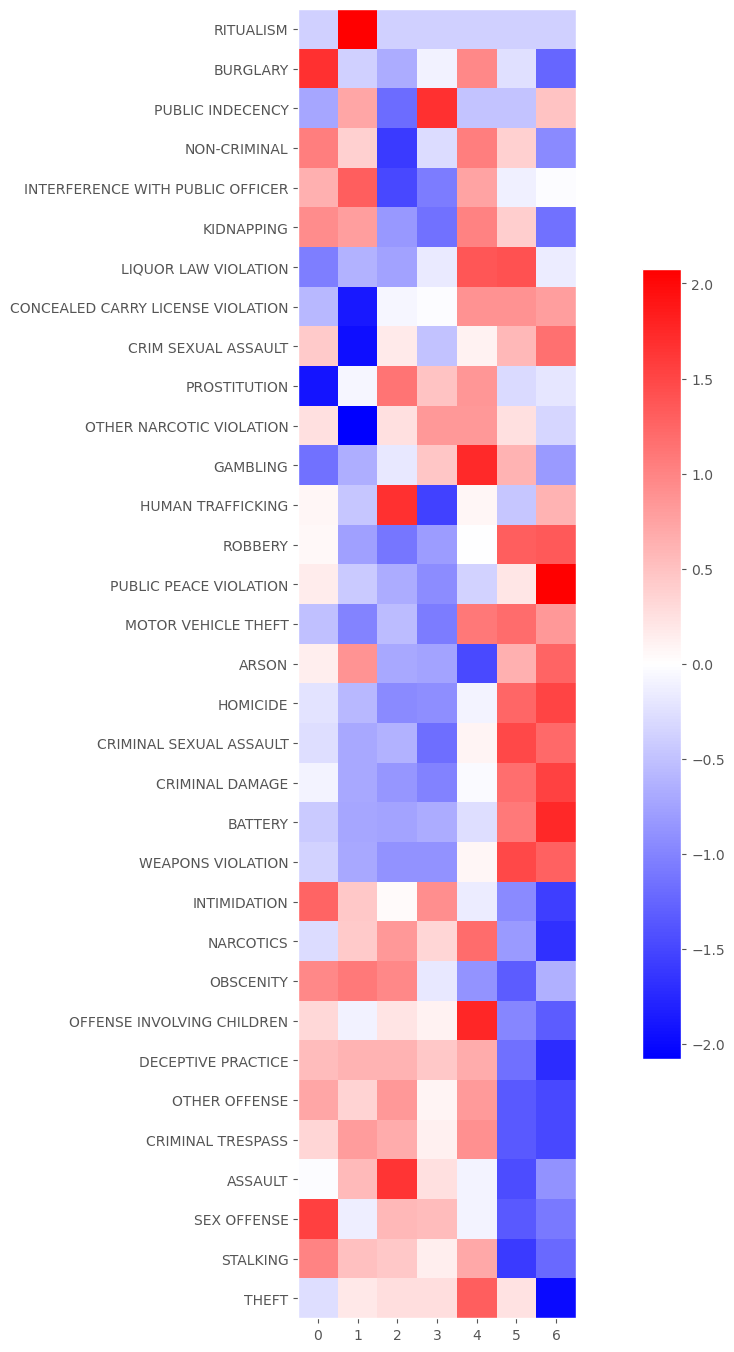

In [247]:
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type)

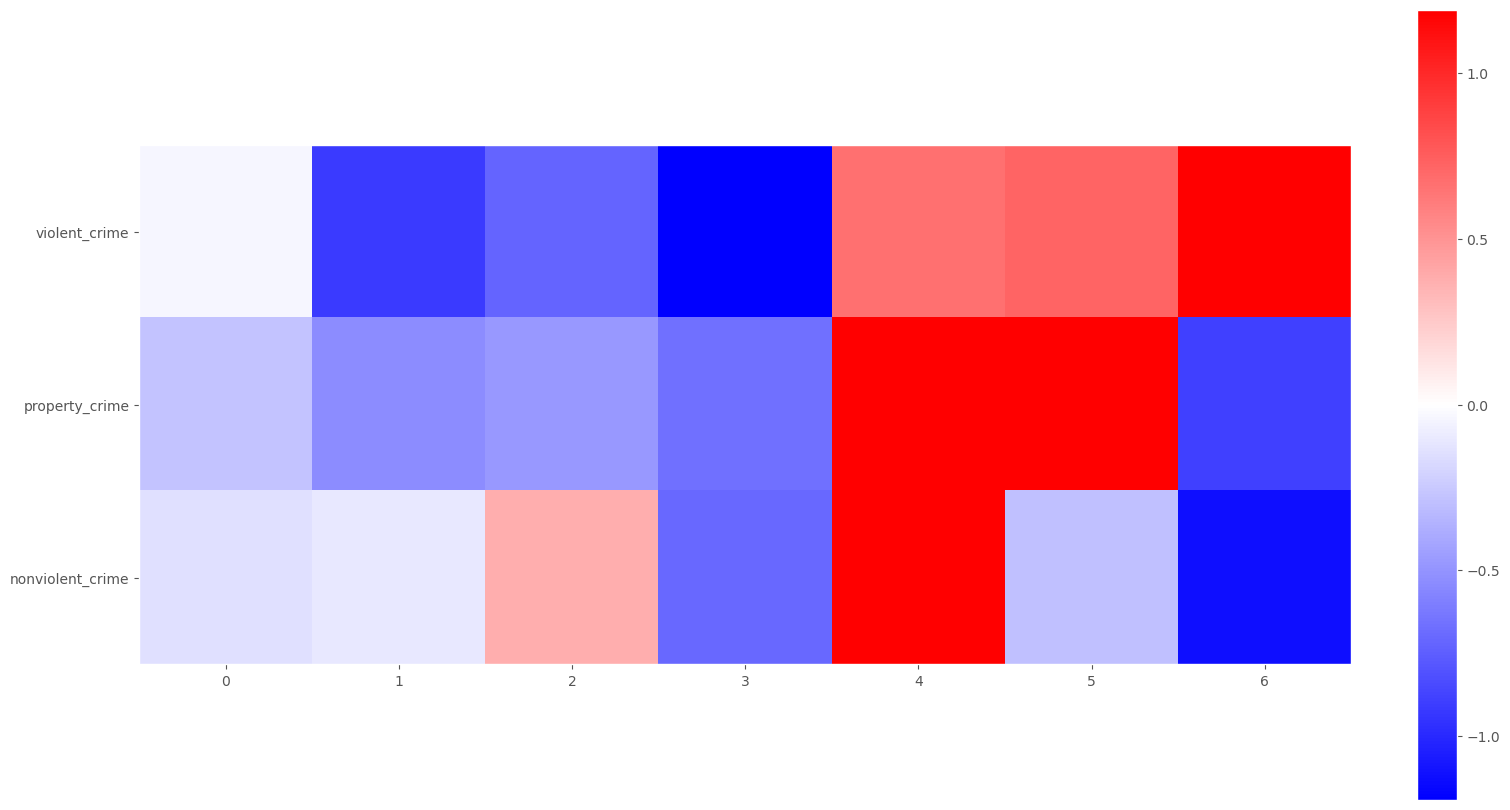

In [253]:
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type_crime)

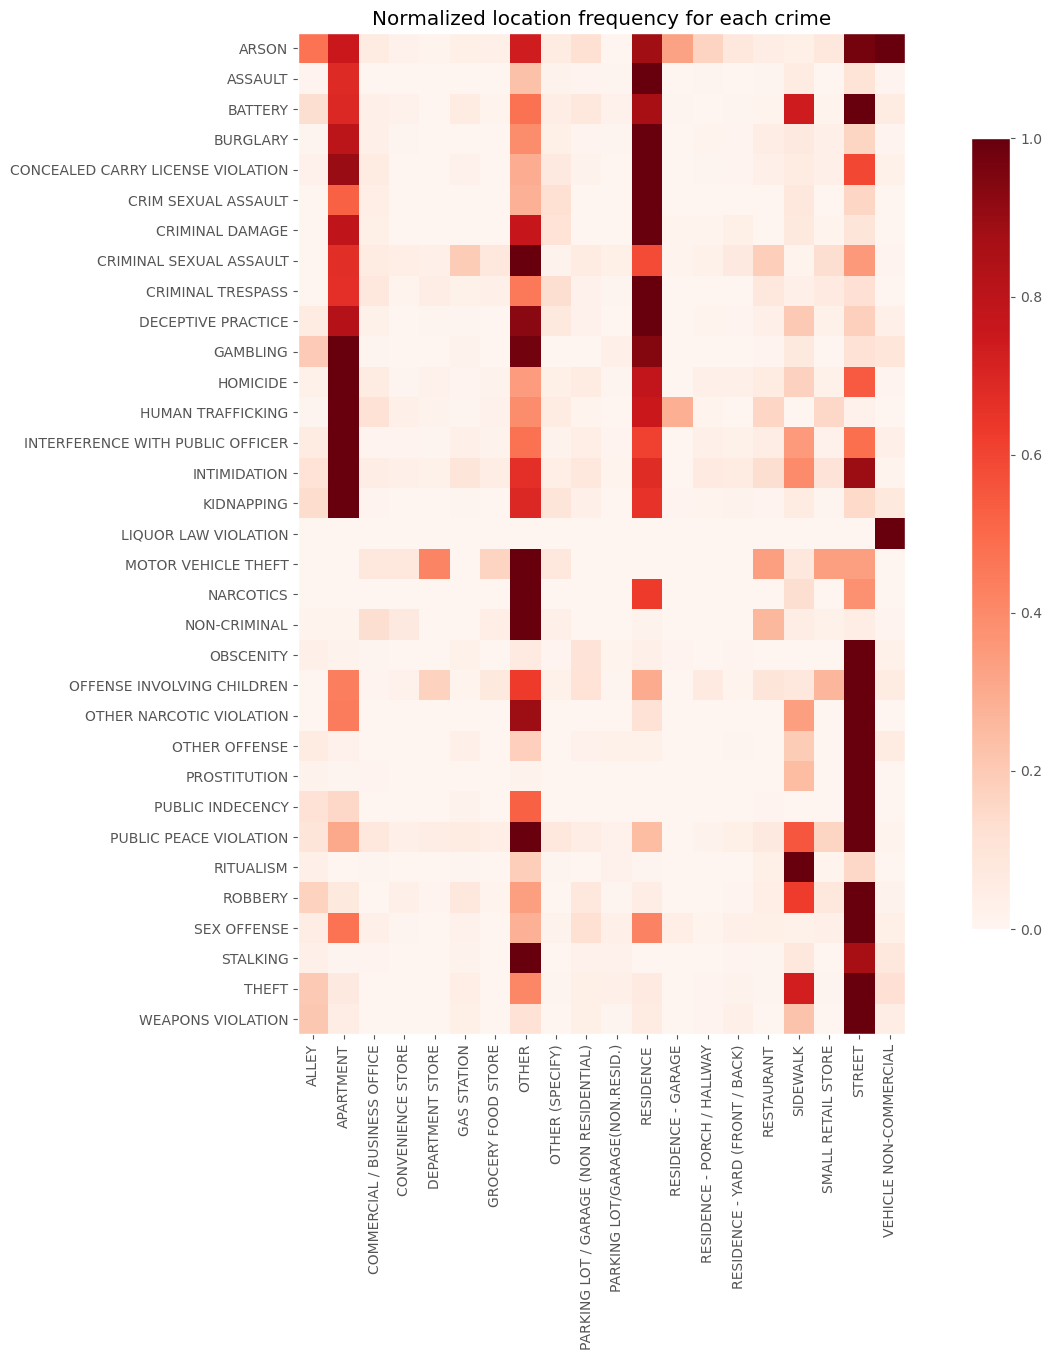

In [256]:
df2= normalize(location_by_type)
ix = AC(3).fit(df2.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df2.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df2.shape[0]), df2.index, rotation='vertical')
plt.yticks(np.arange(df2.shape[1]), df2.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

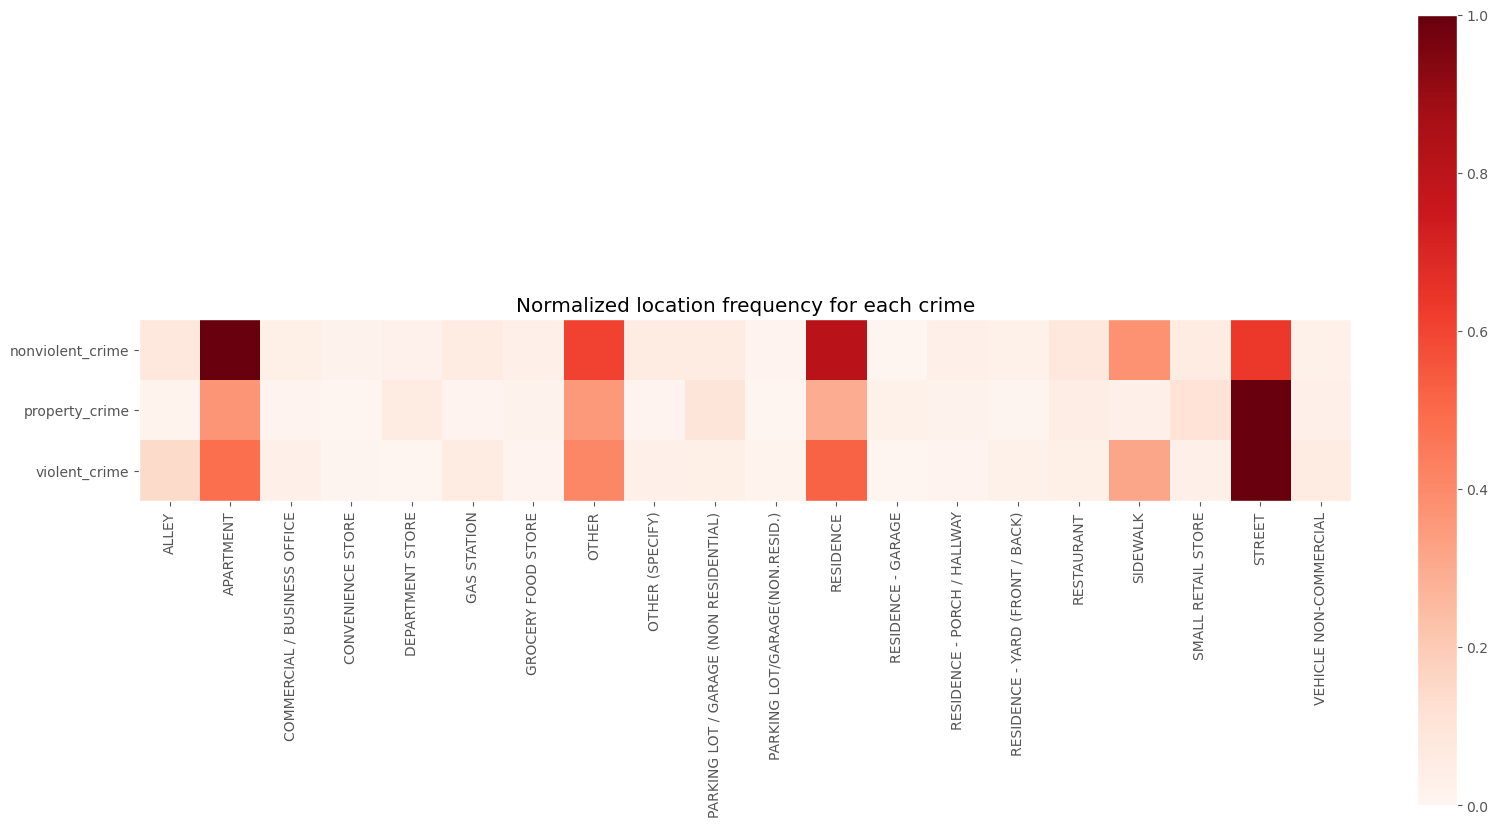

In [257]:
df2= normalize(location_by_type_crime)
ix = AC(3).fit(df2.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df2.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df2.shape[0]), df2.index, rotation='vertical')
plt.yticks(np.arange(df2.shape[1]), df2.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [261]:
df

primary_type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
location_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALLEY,0.472081,0.107685,0.060824,0.004425,0.028103,0.197183,0.049670,0.134745,0.000000,0.002221,0.028777,0.112853,0.00,0.056888,0.006250,0.127517,0.012727,0.030050,0.201072,0.000,0.000000,0.008040,0.000000,0.020850,0.019492,0.000000,0.090333,0.0,0.170601,0.057451,0.025974,0.000000,0.208165
APARTMENT,0.751269,1.000000,1.000000,1.000000,0.004684,1.000000,0.471410,1.000000,0.670422,0.667771,0.000000,0.149425,0.52,0.022567,0.796875,0.691275,0.012727,0.019322,0.068884,0.000,0.788235,0.681226,0.444444,0.897024,0.007627,0.000000,0.305864,0.0,0.070491,0.821664,1.000000,0.431084,0.047664
COMMERCIAL / BUSINESS OFFICE,0.055838,0.047468,0.009629,0.112802,0.011710,0.007042,0.030603,0.009013,0.057049,0.085141,0.007194,0.000000,0.04,0.000940,0.031250,0.033557,0.127273,0.004406,0.000734,0.000,0.035294,0.001304,0.000000,0.053112,0.011017,0.083333,0.079239,0.0,0.000582,0.025733,0.059369,0.009766,0.001620
CONVENIENCE STORE,0.022843,0.034132,0.008774,0.032140,0.000000,0.000000,0.003942,0.001803,0.042151,0.014179,0.000000,0.000000,0.00,0.000470,0.006250,0.020134,0.069091,0.000135,0.002423,0.000,0.000000,0.000000,0.000000,0.003775,0.000000,0.083333,0.034865,0.0,0.033887,0.003591,0.007421,0.022712,0.002475
DEPARTMENT STORE,0.015228,0.027306,0.005600,0.019020,0.002342,0.000000,0.000000,0.000000,0.033975,0.045372,0.000000,0.000000,0.00,0.001410,0.000000,0.000000,0.000000,0.000151,0.000000,0.000,0.000000,0.000435,0.000000,0.000834,0.000000,0.416667,0.044374,0.0,0.008731,0.005386,0.022263,0.168750,0.000000
GAS STATION,0.035533,0.091139,0.032263,0.005823,0.018735,0.017606,0.021972,0.006309,0.194767,0.023916,0.007194,0.019331,0.00,0.028209,0.000000,0.053691,0.001818,0.025342,0.041492,0.000,0.000000,0.002173,0.000000,0.020147,0.002542,0.000000,0.059429,0.0,0.078769,0.004189,0.011132,0.013344,0.036007
GROCERY FOOD STORE,0.032995,0.049864,0.016225,0.023290,0.002342,0.003521,0.003672,0.001352,0.083576,0.031296,0.000000,0.000000,0.00,0.000000,0.003125,0.013423,0.040000,0.000370,0.002130,0.000,0.000000,0.000435,0.000000,0.003599,0.000000,0.166667,0.041997,0.0,0.015004,0.001795,0.018553,0.072415,0.001350
OTHER,0.733503,0.667360,0.475250,0.394457,1.000000,0.975352,0.279804,0.687697,1.000000,0.450340,0.187050,0.520376,0.28,0.182887,0.387500,0.476510,1.000000,0.062707,0.408607,1.000,0.764706,0.227075,0.888889,0.293214,0.016102,1.000000,0.993661,0.0,0.335575,0.928187,0.345083,0.626380,0.109596
OTHER (SPECIFY),0.060914,0.039738,0.019367,0.060011,0.002342,0.000000,0.018963,0.093736,0.018714,0.126824,0.007194,0.000000,0.12,0.000940,0.037500,0.046980,0.034545,0.009652,0.005728,0.000,0.105882,0.019122,0.000000,0.066456,0.000000,0.083333,0.079239,0.0,0.000000,0.071813,0.038961,0.024287,0.002205


In [ ]:
### continue from here 
### figure out why this isnt working

rerun everything in a neater way 

In [260]:
df.iloc[(df[['longitude']].values < -88.0).flatten(), df.columns=='longitude'] = 0.0
df.iloc[(df[['longitude']].values > -87.5).flatten(), df.columns=='longitude'] = 0.0
df.iloc[(df[['latitude']].values < 41.60).flatten(),  df.columns=='latitude'] = 0.0
df.iloc[(df[['latitude']].values > 42.05).flatten(),  df.columns=='latitude'] = 0.0
df.replace({'latitude': 0.0, 'longitude': 0.0}, np.nan, inplace=True)
df.dropna(inplace=True)





KeyError: "None of [Index(['longitude'], dtype='object', name='primary_type')] are in the [columns]"

In [ ]:
crimes_new = crimes[(crimes['Primary Type'] == 'SEX OFFENSE') | (crimes['Primary Type'] == 'HOMICIDE') | (crimes['Primary Type'] == 'ARSON')]
ax = sns.lmplot('Longitude', 'Latitude',
                data= crimes_new[['Longitude','Latitude']],
                fit_reg=False,
                size=4, 
                scatter_kws={'alpha':.1})
ax = sns.kdeplot(crimes_new[['Longitude','Latitude']],
                 cmap="jet", 
                 bw=.005,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False)
ax.set_xlim(-87.9,-87.5)
ax.set_ylim(41.60,42.05)
#ax.set_axis_off()

In [172]:
#indentifying missing values and how often they occur
df.isna()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,x_coordinate,y_coordinate,latitude,longitude,location.latitude,location.longitude,location.human_address,total_offenders_in_ca,total_complaints_in_ca,crime_category
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False
2019-01-01,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False
2019-01-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False
2019-01-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False
2019-01-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [173]:
#indentifying missing values and how often they occur
df.isna().sum() #looking at the sum of the number of null values per column

id                            0
case_number                   0
date                          0
block                         0
iucr                          0
primary_type                  0
description                   0
location_description       6241
arrest                        0
domestic                      0
beat                          0
district                      0
ward                         48
community_area                2
fbi_code                      0
year                          0
updated_on                    0
x_coordinate              17007
y_coordinate              17007
latitude                  17007
longitude                 17007
location.latitude         17007
location.longitude        17007
location.human_address    17007
total_offenders_in_ca     16723
total_complaints_in_ca        2
crime_category                0
dtype: int64

In [174]:
# checking for any duplicated rows in df
df.duplicated()
#will show true if duplicated, false is not


date
2019-01-01    False
2019-01-01    False
2019-01-01    False
2019-01-01    False
2019-01-01    False
              ...  
2023-12-31    False
2023-12-31    False
2023-12-31    False
2023-12-31    False
2023-12-31    False
Length: 1181139, dtype: bool

In [29]:
#df.loc to see the location of these values
df.loc[df.duplicated()]


#check later if there are any specific duplicated row values like so 

df.loc[df.duplicated(subset=['cloumn_name'])]

#then to get a closer look at an idea of why we have duplicated rows we can query it 

df.query('column_name'=="column_value")

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location.latitude,location.longitude,location.human_address,total_offenders_in_ca,total_complaints_in_ca


In [175]:
# dropping total_offenders_in_ca  

df=df.drop(['total_offenders_in_ca'],axis=1)

In [176]:
df.shape

(1181139, 26)

### feature understanding

figuring out what the distribution is of the data set and some potential outliers in the data set 
   - univariate analysis 
   - plotting feature distributions 
   - historgrams 
   - KDE 
   - boxplot

In [112]:
#figuring out how many unique values there are of crime 
df['primary_type'].unique()

array(['SEX OFFENSE', 'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN', 'BATTERY', 'THEFT',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'CRIM SEXUAL ASSAULT',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'WEAPONS VIOLATION', 'BURGLARY',
       'ASSAULT', 'CRIMINAL TRESPASS', 'NARCOTICS',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'KIDNAPPING', 'INTIMIDATION',
       'STALKING', 'ARSON', 'CONCEALED CARRY LICENSE VIOLATION',
       'HOMICIDE', 'HUMAN TRAFFICKING', 'GAMBLING', 'OBSCENITY',
       'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM'], dtype=object)

In [113]:
df.primary_type.nunique()

33

In [225]:
#used nicoles type of crime mapping technique 

type_of_crime = {'CRIMINAL SEXUAL ASSAULT' : 'violent_crime', 
                'OFFENSE INVOLVING CHILDREN' : 'violent_crime', 
                'THEFT' : 'property_crime',
                'DECEPTIVE PRACTICE' : 'violent_crime', 
                'OTHER OFFENSE' : 'nonviolent_crime', 
                'BURGLARY' : 'property_crime',
                'CRIMINAL DAMAGE' : 'property_crime', 
                'CRIMINAL TRESPASS' : 'nonviolent_crime', 
                'WEAPONS VIOLATION' : 'nonviolent_crime',
                'BATTERY' : 'violent_crime', 
                'STALKING' : 'nonviolent_crime', 
                'ASSAULT' : 'violent_crime', 
                'SEX OFFENSE' : 'violent_crime',
                'MOTOR VEHICLE THEFT' : 'property_crime', 
                'OBSCENITY' : 'nonviolent_crime', 
                'PUBLIC PEACE VIOLATION' : 'nonviolent_crime',
                'LIQUOR LAW VIOLATION' : 'nonviolent_crime', 
                'ROBBERY' : 'violent_crime', 
                'HOMICIDE' : 'violent_crime', 
                'NARCOTICS' : 'nonviolent_crime',
                'ARSON' : 'property_crime', 
                'CONCEALED CARRY LICENSE VIOLATION' : 'nonviolent_crime',
                'INTERFERENCE WITH PUBLIC OFFICER' : 'nonviolent_crime', 
                'KIDNAPPING' : 'violent_crime', 
                'INTIMIDATION' : 'nonviolent_crime',
                'PROSTITUTION' : 'nonviolent_crime', 
                'GAMBLING' : 'nonviolent_crime',
                'CRIM SEXUAL ASSAULT' : 'violent_crime',
                'HUMAN TRAFFICKING' : 'violent_crime', 
                'NON-CRIMINAL' : 'nonviolent_crime', 
                'OTHER NARCOTIC VIOLATION' : 'nonviolent_crime', 
                'PUBLIC INDECENCY' : 'nonviolent_crime',
                'RITUALISM' : 'violent_crime'}

df['crime_category'] = df['primary_type'].map(type_of_crime)



#Crime analysis and prediction using optimized k-means algorithm

In [177]:
df.shape

(1181139, 26)

In [178]:

df['year'].value_counts()

2019    261407
2023    259303
2022    239128
2020    212292
2021    209009
Name: year, dtype: int64

In [179]:
df['updated_on'].value_counts()

2023-01-03 15:40:27    227550
2023-08-19 15:40:26    153936
2020-12-17 15:40:05     30156
2019-06-30 15:41:21     24251
2021-09-07 15:41:02     16083
                        ...  
2022-10-11 15:41:02         1
2022-09-28 15:41:08         1
2022-11-14 15:40:58         1
2022-08-09 15:40:53         1
2022-07-16 15:46:14         1
Name: updated_on, Length: 3567, dtype: int64

Text(0, 0.5, 'count')

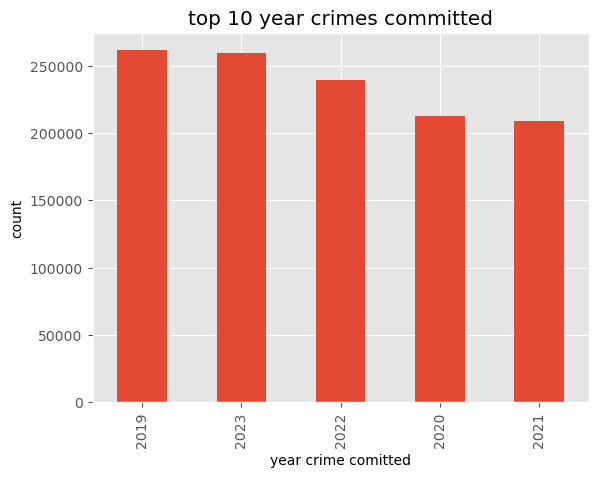

In [180]:
# ax = makes it so we can save this as matplotlib axis 
ax=df['year'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='top 10 year crimes committed')
ax.set_xlabel('year crime comitted')
ax.set_ylabel('count')

In [128]:
df.primary_type.value_counts()

THEFT                                256338
BATTERY                              216387
CRIMINAL DAMAGE                      133834
ASSAULT                              102514
DECEPTIVE PRACTICE                    87596
MOTOR VEHICLE THEFT                   80072
OTHER OFFENSE                         73375
ROBBERY                               43743
WEAPONS VIOLATION                     41099
BURGLARY                              40049
NARCOTICS                             37754
CRIMINAL TRESPASS                     23321
OFFENSE INVOLVING CHILDREN             9958
CRIMINAL SEXUAL ASSAULT                6570
SEX OFFENSE                            5970
PUBLIC PEACE VIOLATION                 4960
INTERFERENCE WITH PUBLIC OFFICER       3489
HOMICIDE                               3467
ARSON                                  2418
STALKING                               1749
PROSTITUTION                           1547
CRIM SEXUAL ASSAULT                     983
LIQUOR LAW VIOLATION            

In [129]:
df.crime_category.value_counts()

property_crime      512711
violent_crime       477880
nonviolent_crime    190548
Name: crime_category, dtype: int64

<Axes: ylabel='Frequency'>

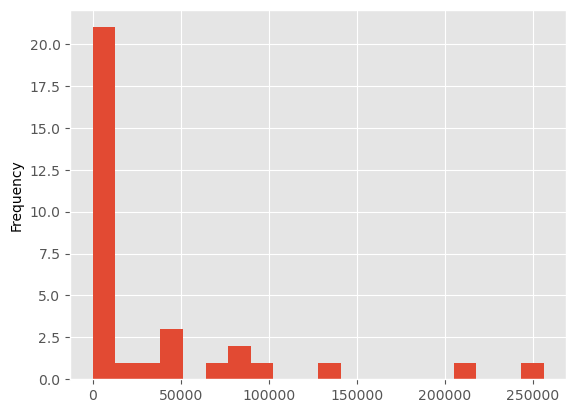

In [130]:
# want to see distribution of data
# seeing in which bins the count of that value is highest in a particular column and in our case the crime cateogory
df.primary_type.value_counts().plot(kind='hist',bins=20)
#df['primary_type'].count().plot(kind='hist',bins=20)

In [131]:
# Create a heatmap to display the Counts for Crime Category

# Create a new dataframe for grouping the type of crime and their counts
df_crime = df['id'].groupby(df['crime_category']).agg(['count'])

# Sort the counts into descending order under the object name province_heatmap
crime_heatmap = df_crime.sort_values(by=['count'], ascending = False).reset_index()

# Create a heatmap of the province counts
crime_heatmap.style.background_gradient(cmap = 'Blues')

,crime_category,count
0,property_crime,512711
1,violent_crime,477880
2,nonviolent_crime,190548
